# Mass-Concentration Relation

Here I study the redshift dependence of the mass-concentration relations. Also, how I can have an effective NFW profile for the DES redshift range. 

The motivation of this work is the DES Y3 Cluster pipeline. The NFW profile is assumed to depend only on Mass and radii. The redshift evolution is not accounted for. 

### Duffy Concetration Relation

Duffy et al. 2010 assumed a simply power-law model:
$$
c(M, z) = A \left(\frac{M_{200c}}{M_{\rm pivot}}\right)^\alpha (1+z)^\beta
$$

Where $A=7.85$, $\alpha=-0.081$ and $\beta=-0.71$.

We can derive a similar relation to the scale radius, $R_s = R_{200c}/c$. Thus,

$$
R_s(M, z) = R_s(M, z=0) \times (1+z)^{-\beta} E(z)^{-2/3} 
$$

The $E^2(z) = \Omega_m (1+z)^3 + (1-\Omega_m)$ term stems from the critical density $\rho_c = 3H^2(z)/8\pi G$. The slope goes to zero with the redshift because of $E(z)$ in the local universe is 0.71 and decreases to 0.06 at z=0.65. Since, in the limit of matter dominated universe, the scale radius is:
$$
R_s \rightarrow (1+z)^{-1-\beta} = (1+z)^{0.06}  \; \; \text{for    } z = 0.65
$$



In [159]:
## actually the highest slope is 0.06 for z=0.65
0.71 -( 0.3*(1+0.65)**3 - 0.7)

0.0623625000000001

### Visualize the Evolution

Let's take a close look how the concentration and the scale radius involves with the redshift. Our final goal is to derive an effective redshift for this quantities.

In [87]:
import numpy as np

In [88]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
cosmo

FlatLambdaCDM(H0=70.0 km / (Mpc s), Om0=0.3, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=None)

In [89]:
rho_c = cosmo.critical_density0.to(u.Msun/u.Mpc**3)
rho_c

<Quantity 1.35992947e+11 solMass / Mpc3>

In [177]:
H0 = 70 # km/s/Mpc
G = 4.301e-9 # Mpc km^2/s^2/Msun
# rhoc = 3*H0**2/(8*np.pi*G) # Msun/Mpc^3
rhoc = rho_c.value

def rhocz(z):
    rcz = cosmo.critical_density(z).to(u.Msun/u.Mpc**3)
    return rcz.value

def _concentration(M,alpha=-0.081,Mpiv=1e12):
    return 7.85*(M/Mpiv)**(alpha)

def M_to_R(M,z=0):
    rz = rhocz(z)
    return (M/(4*np.pi*200*rz/3))**(1/3.)

def _scale_radius(M):
    c0 = _concentration(M)
    r200 = M_to_R(M)
    return 100*r200/c0

def concentration(M,z,beta=-0.71,alpha=-0.081,Mpiv=1e12):
    cz0 = _concentration(M)
    return cz0*(1+z)**(beta)

def ez(z,omegam=0.3):
    return omegam*(1+z)**3+(1-omegam)

def scale_radius(M,z,omegam=0.3,beta=-0.71,alpha=-0.081,Mpiv=1e12):
    cz = concentration(M,z,beta=-0.71,alpha=-0.081,Mpiv=1e12)
    r200 = M_to_R(M,z=0)/(ez(zvec,omegam=omegam))**(1/3)
    return 100*r200/cz

In [164]:
M0 = 1e15
c0 = _concentration(M0)
c0

4.486107297874156

In [165]:
r0 = M_to_R(M0)
r0

2.0627899313993696

In [166]:
rs0 = _scale_radius(M0)
rs0

45.981734150158864

Text(0.5, 1.0, 'Duffy Concentration Relation')

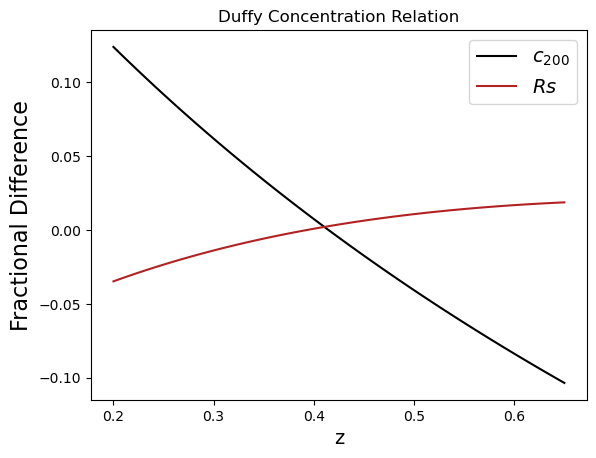

In [167]:
import matplotlib.pyplot as plt

# rvec = np.logspace(-2, 1.3, 1000)
zvec = np.linspace(0.2, 0.65, 100)

cvec = concentration(M0, zvec)
cmean = np.mean(cvec)

rsvec = scale_radius(M0, zvec)
rsmean = np.mean(rsvec)

plt.plot(zvec, (cvec-cmean)/cmean, color='k',label=r'$c_{200}$')
plt.plot(zvec, (rsvec-rsmean)/rsvec, color='firebrick',label=r'$Rs$')

plt.legend(fontsize=14)
plt.xlabel('z',fontsize=14)
plt.ylabel('Fractional Difference',fontsize=16)
plt.title('Duffy Concentration Relation')

Text(0.5, 1.0, 'Assuming Duffy Relation: Dependence w/ Cosmology')

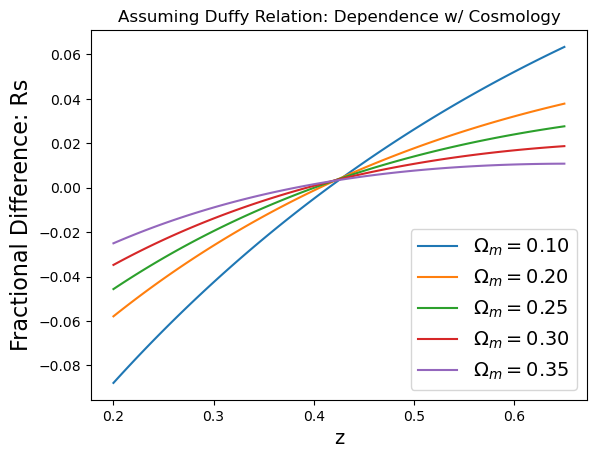

In [180]:
import matplotlib.pyplot as plt

# rvec = np.logspace(-2, 1.3, 1000)
zvec = np.linspace(0.2, 0.65, 100)

cvec = concentration(M0, zvec)
cmean = np.mean(cvec)

for oi in [0.1, 0.2, 0.25, 0.3, 0.35]:
    rsvec = scale_radius(M0, zvec, omegam=oi)
    rsmean = np.mean(rsvec)
    # plt.plot(zvec, (cvec-cmean)/cmean, color='k',label=r'$c_{200}$')
    plt.plot(zvec, (rsvec-rsmean)/rsvec, label=r'$\Omega_m=%.2f$'%oi)

plt.legend(fontsize=14)
plt.xlabel('z',fontsize=14)
plt.ylabel('Fractional Difference: Rs',fontsize=16)
plt.title('Assuming Duffy Relation: Dependence w/ Cosmology')


## Next Steps:

My next steps regarding concentration:
- How does it depend on cosmology? (take a look at the colossus c-M relations)
- Is the dependence stronger with redshift?
- Can we assume the Duffy et al. 2008 relation?

Readings:
- Collosus Concentration docs: https://bdiemer.bitbucket.io/colossus/halo_concentration.html
- Duffy et al. 2008: https://arxiv.org/pdf/0804.2486.pdf
- Diemer et al. 2019: https://arxiv.org/pdf/1809.07326.pdf

